In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 8

In [4]:
cols = ["name"]+[i for i in range(1,137)]
train_points = pd.read_csv("data/training_frames_keypoints.csv", names=cols)
#train_points.head()
#train_points.loc[train_points["name"]=="Luis_Fonsi_21.jpg"].to_numpy()[0][1:].astype('float').dtype


In [5]:
def name2coords(file):
    key_pts = train_points.loc[train_points["name"]==file.name].to_numpy()[0][1:].astype('float')
    key_pts = torch.tensor(key_pts).reshape(68, 2).flip(1)
    return key_pts

In [6]:
tfx = get_transforms(
    do_flip=False, 
    flip_vert=False, 
    max_rotate=None, 
    max_zoom=1., 
    max_lighting=None, 
    max_warp=None, 
    p_affine=None, 
    p_lighting=None
)


In [7]:

data = (PointsItemList
    .from_folder("data")
    .split_by_folder(train="training", valid="test")
    .label_from_func(lambda o: name2coords(o))
    .transform(tfx, tfm_y=False, size=(224,224))
    .databunch().normalize(imagenet_stats))
data


ImageDataBunch;

Train: LabelList (3462 items)
x: PointsItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: PointsLabelList
ImagePoints (188, 170),ImagePoints (178, 137),ImagePoints (115, 106),ImagePoints (168, 149),ImagePoints (137, 125)
Path: data;

Valid: LabelList (2308 items)
x: PointsItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: PointsLabelList
ImagePoints (188, 170),ImagePoints (178, 137),ImagePoints (137, 125),ImagePoints (180, 217),ImagePoints (288, 233)
Path: data;

Test: None

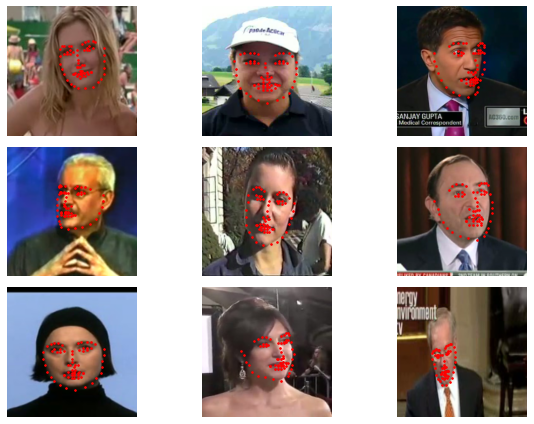

In [8]:
data.show_batch(rows=3, figsize=(9,6))

In [9]:
learn = cnn_learner(data, models.resnet18)

In [10]:
learn.lr_find()

epoch,train_loss,valid_loss,time
0,3.914217,#na#,00:09


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [11]:
lr = 1e-2

In [12]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,time
0,2.061053,0.205747,00:16
1,0.616084,0.016918,00:16
2,0.204758,0.011528,00:16
3,0.076714,0.010511,00:15
4,0.033809,0.010017,00:15


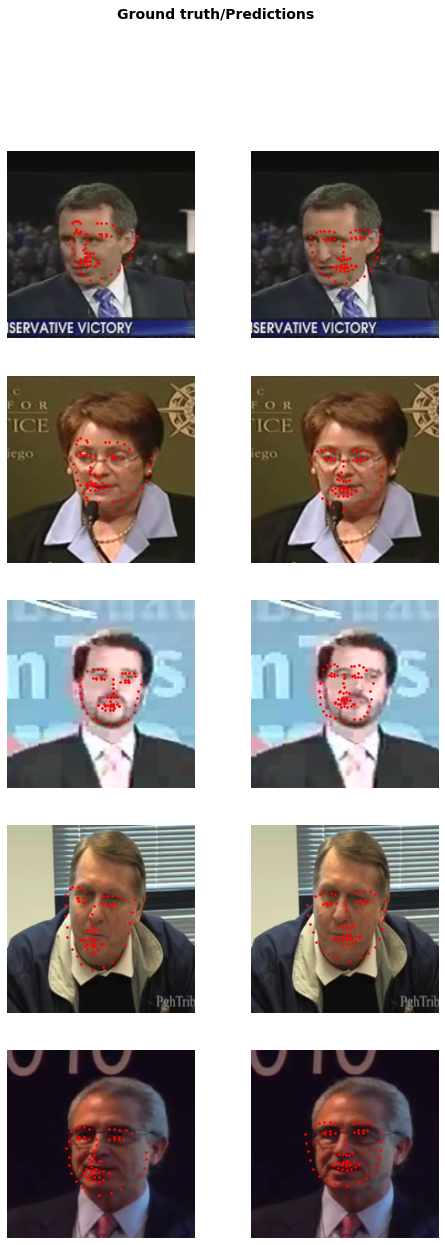

In [13]:
learn.show_results()